# Introdiction
<a font color= Blue>
    
### This data set has the properties of blue and red teams. I prepared a notebook considering the blue team. I hope it was useful.

### I'm new to machine learning, thank you for your help in advance
    
### Instagram:cuneytaykac_
 

## İmport Library

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data=pd.read_csv("/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv")

In [ ]:
data.head()

gameId dropped 

In [ ]:
data.drop(["gameId"],axis=1,inplace=True)

In [ ]:
data.head()


* We will visualize and classify in the blue team.
*  (Biz Mavi takım üzerinde görselleştirme ve classification yapacagımız için bu bilgiler işimizi görür.)

### Let's examine what the column means

* BlueWins:The target column. 1 if the blue team has won, 0 otherwise.
* blueWardsPlaced: Number of warding totems placed by the blue team on the map
* blueWardsDestroyed: Number of enemy warding totems the blue team has destroyed
* blueFirstBlood: First kill of the game. 1 if the blue team did the first kill, 0 otherwise
* blueKills:Number of enemies killed by the blue team
* blueDeaths:Number of deaths (blue team)
* blueAssists:Number of kill assists (blue team)
* blueEliteMonsters: Number of elite monsters killed by the blue team (Dragons and Heralds)
* blueDragons:Number of dragons killed by the blue team


##### All we have to do is to set our data to cover only the blue team.
##### datamızı sadece mavi takımı kapsayacak şekilde ayarlamak kaldı.İşlem kolaylıgı olması için ilk 100 satır üzerinden işlem yapıcaz

In [ ]:

dt=data.loc[:,:"blueDragons"].head(100)

In [ ]:
dt.head()

In [ ]:
dt.shape

In [ ]:
dt.info()

In [ ]:
dt.describe().T

# Vizualizate

In [ ]:
dt.head()

In [ ]:
sns.countplot(dt.blueWins)
plt.xlabel("Win(1) and Loss(0)")
plt.title("WİNNER AND LOSTER")
plt.show()

In [ ]:
x=dt.blueKills.value_counts().index
y=dt.blueKills.value_counts().values
plt.figure(figsize=(15,8))
sns.barplot(x,y)
plt.title("Blue Team Kİll Rate")
plt.xlabel(" Kİll Number")
plt.ylabel(" KİLL Rate")
plt.xticks(rotation= 45)
plt.show()


In [ ]:
sns.boxplot(x="blueKills",y="blueDeaths",data=dt,palette="PRGn")

# LOJİSTİC REGRESSİON

### What lojistic regression?
* Logistic Regression ( Lojistik Regresyon ) sınıflandırma işlemi yapmaya yarayan bir regresyon yöntemidir. Kategorik veya sayısal verilerin sınıflandırılmasında kullanılır. Bağımlı değişkenin yani sonucun sadece 2 farklı değer alabilmesi durumda çalışır. ( Evet / Hayır, Erkek /Kazandı ,Kaybetti vs. )
* Şimdiki örnegimizde Mavi takımın Kazanma ve kaybetmeleri üzerinde lojistic regression yapıcaz. (1 kazanma 0 kaybetme)
* Gelin ilk olarak sklearn kütüphanesine ait Lojistic regression kütüphanesini kullanmadan nasıl yazabiliriz inceleyelim.



İlk olarak x ve y degerlerimizi belirleyelim.


In [ ]:
dt.tail()

Y degerlerim benim kazanma kaybetme degerlerim
* X degerlerim ise BlueWins hariç geri kalan kısım

In [ ]:
y=dt.blueWins.values
x_data=dt.drop(["blueWins"],axis=1)

## Normalization

* Normalize etmek Column degerleri arasındaki üstünlügü ortadan kaldırma olayıdır.Kısaca Yüksek degerlerin daha düşük degerleri yok saymaması için.
* Örnek blueWardsPlaced'daki 75 sayısının blueWardsDestroyed'daki 2 degeri üzerinde üstünlügü 
* Matematiksel ifadesi :
    * norm:x-min(x)/max(x)-min(x)

In [ ]:
#Normalization
x=(x_data-np.min(x_data)/np.max(x_data)-np.min(x_data))


* Şimdiki bölüm ise datamızı bölme işlemine.Buradaki amaç modelimizi egitirken test etmek için bir test datasına ihtiyaç duyuyoruz onu belirlemek.
* Datayı istediginiz şekilde test ve train split olarak bölebilirsiniz.


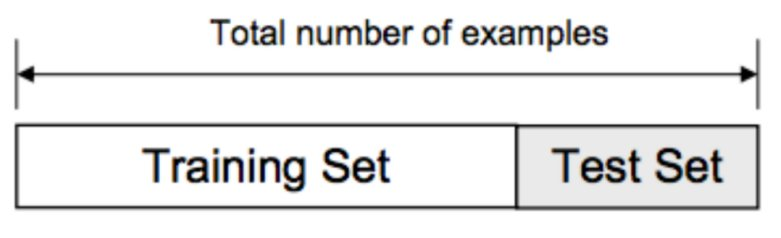

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


* random state yazmassak train test split random bir şekilde böler 
* test size 0.1 :datamın %10 sini test etmek için ayır.

# İnitalize

* Buradaki olay Şu şekilde gerçekleşiyor.Elimizdeki w degerleri x_trainlerler çarpılır ve bias degerleriyle toplanır. 

 * Formülü:Z = (w.t)x + b => z equals to (transpose of weights times input x) + bias
 

In [ ]:
def initialize(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

# Sigmoid Function 





Let's say weight = 0.01 and bias = 0.0

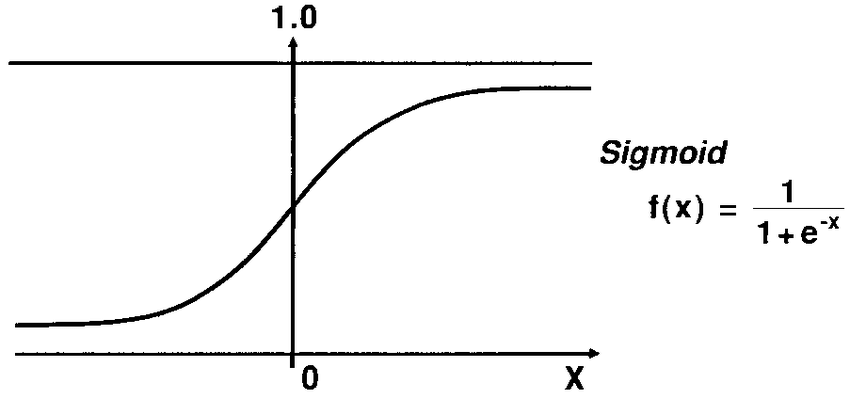

In [ ]:

def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

# Fogward Propagation

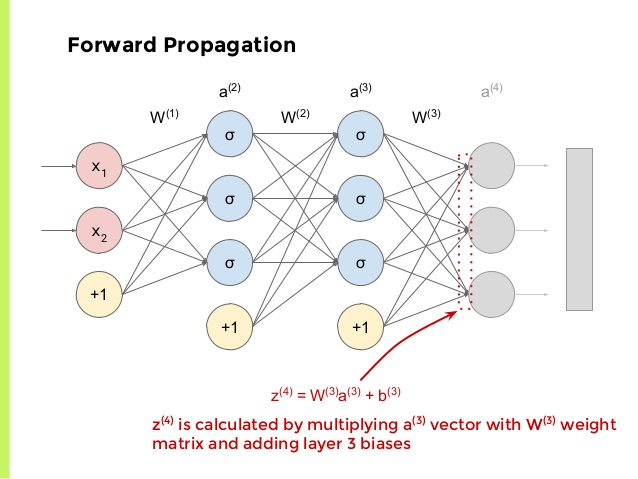

Cost Function

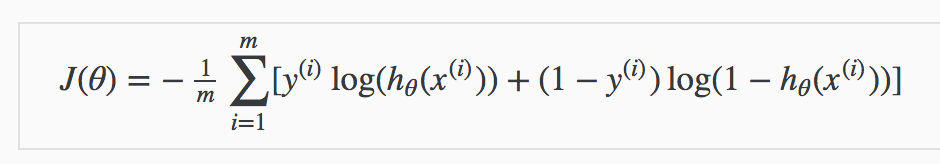

Gradient Descent




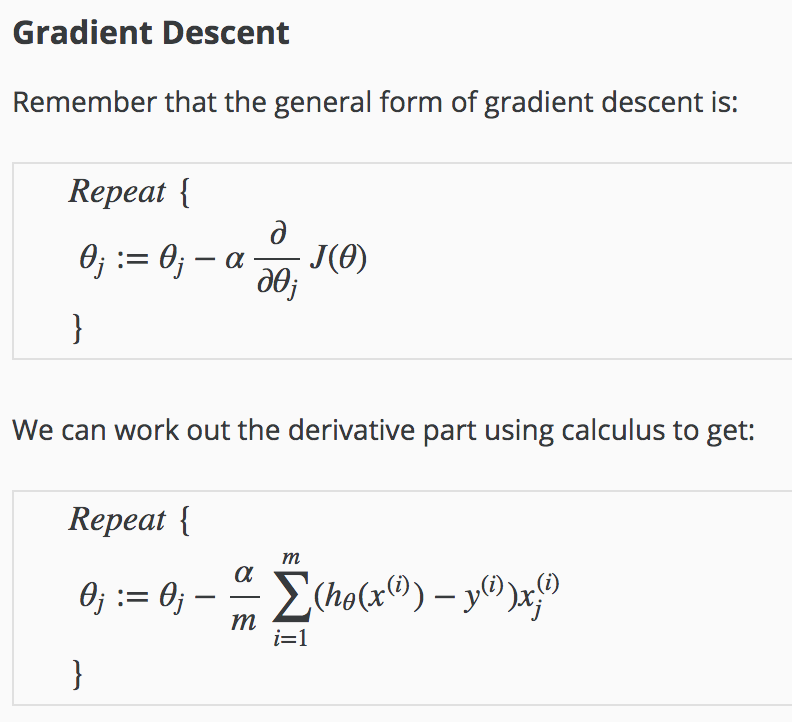

By the way in formulas;

* h0(x^i)= y_head
* y^i = y_train
* x^i = x_train

In [ ]:
def forward_backward(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    
    y_head = sigmoid(z)
    
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    
    cost = (np.sum(loss))/x_train.shape[1]  
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

In [ ]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
   
    for i in range(number_of_iterarion):
 
        cost,gradients = forward_backward(w,b,x_train,y_train)
        cost_list.append(cost)
         
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
   
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]  
    w,b = initialize(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
     
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

   
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    

In [ ]:
logistic_regression(x_train, y_train, x_test, y_test,1,180)

<font color="green"> Test Accuracy is <font color="red">**73.33%**</font></font><br>

Sklearn Lojistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)
accuracy = lr.score(x_test.T,y_test.T)*100
print("Test Accuracy {}%".format(accuracy))

# KNN Algorithm

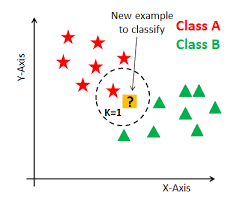

In [ ]:
y=dt.blueWins.values
x_data=dt.drop(["blueWins"],axis=1)
x=(x_data-np.min(x_data)/np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {}% ".format(2,knn.score(x_test,y_test)))



In [ ]:

# find and try k value
score_list = []
for i in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,25),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()


[](http://)<font color="blue"> 2 nn score <font color="green">**0.75%**</font></font><br>
<br>


# Support Vector Machine (SVM) Algorithm

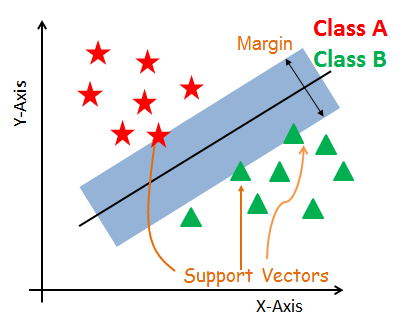

In [ ]:
dt.head()

In [ ]:
y=dt.blueWins.values
x_data=dt.drop(["blueWins"],axis=1)
x=(x_data-np.min(x_data)/np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
#SVM
from sklearn.svm import SVC
svm=SVC(random_state=2)
svm.fit(x_train,y_train)
print("Accuracy of SVM ",svm.score(x_test,y_test))

<font color="red">Accuracy of SVM <font color="green">**0.63**</font></font><br>

# Naive Bayes Algorithm

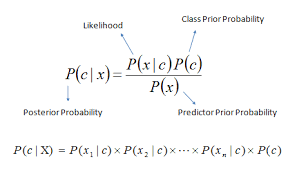

In [ ]:
y=dt.blueWins.values
x_data=dt.drop(["blueWins"],axis=1)
x=(x_data-np.min(x_data)/np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
acc=nb.score(x_test,y_test)*100
print("Accuracy of naive bayes algo:{:.2f}".format(acc))

![](http://)<font color="Orange">Accuracy of naive bayes algo  <font color="Red">**66.6**</font></font><br>

# Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

![](http://)<font color="Blue"> Decision Tree Score   <font color="Red">**0.6**</font></font><br>

# Confusion Matrix

In [ ]:

# Predicted values
y_head_lr = lr.predict(x_test)
knn1=KNeighborsClassifier(n_neighbors =1)
knn1.fit(x_train, y_train)
y_head_knn=knn1.predict(x_test)
y_head_svm=svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dt = dt.predict(x_test)



In [ ]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dt = confusion_matrix(y_test,y_head_dt)


In [ ]:
#Vizualizate
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Caner Dabakoglu thank you 